<a href="https://colab.research.google.com/github/Chirag314/EDA/blob/main/Covid_flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid+flue dataset from book -Feature Engineering bootcamp

In [23]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/sinanuozdemir/feature_engineering_bookcamp/main/data/covid_flu.csv'
df= pd.read_csv(url)
#df = pd.read_csv(url)
print(df.head(5))

  Diagnosis InitialPCRDiagnosis   Age Sex  neutrophil  \
0      H1N1                 NaN  67.0   F         NaN   
1      H1N1                 NaN  29.0   M         NaN   
2      H1N1                 NaN  22.0   F         NaN   
3      H1N1                 NaN  20.0   F         NaN   
4      H1N1                 NaN  21.0   M         NaN   

   serumLevelsOfWhiteBloodCell  lymphocytes CReactiveProteinLevels  \
0                          NaN          NaN                    NaN   
1                          NaN          NaN                    NaN   
2                          NaN          NaN                    NaN   
3                          NaN          NaN                    NaN   
4                          NaN          NaN                    NaN   

   DurationOfIllness CTscanResults RiskFactors GroundGlassOpacity Diarrhea  \
0                NaN           NaN         NaN                NaN      NaN   
1                NaN           NaN         NaN                NaN      NaN   
2 

In [24]:
# Check missing values
print(df.isnull().mean())

Diagnosis                      0.000000
InitialPCRDiagnosis            0.929825
Age                            0.018893
Sex                            0.051282
neutrophil                     0.930499
serumLevelsOfWhiteBloodCell    0.898111
lymphocytes                    0.894737
CReactiveProteinLevels         0.907557
DurationOfIllness              0.941296
CTscanResults                  0.892713
RiskFactors                    0.858974
GroundGlassOpacity             0.937247
Diarrhea                       0.696356
Fever                          0.377193
Coughing                       0.420378
ShortnessOfBreath              0.949393
SoreThroat                     0.547908
NauseaVomitting                0.715924
Temperature                    0.576248
Fatigue                        0.641700
dtype: float64


Most ML models are unable to deal with missing values. Our first section of feature improvement will begin to deal immediately with these missing values by talking about ways to fill in these missing values to make them usable for our ML model.

In [25]:
#check percentage breakdown of our response variable
df['Diagnosis'].value_counts(normalize=True)

H1N1       0.723347
COVID19    0.276653
Name: Diagnosis, dtype: float64

Our most common category is H1N1, with just over 72% of our response variable belonging to that category. Our null accuracy is 72%—the accuracy of a classification model that just guesses the most common category over and over again. Our absolute baseline for our machine learning pipeline will have to be beating the null accuracy. If our model just guessed H1N1 for every person coming in, technically, that model would be accurate 72% of the time, even though it isn’t really doing anything. But hey, even a guessing ML model is right 72% of the time.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

As we saw in our EDA, we have a lot of missing data to account for. We have two options for dealing with missing values:

We can remove observations and rows that have missing data in them, but this can be a great way to throw out a lot of useful data.

We can impute the values that are missing, so we don’t have to throw away the entire observation or row.

In [27]:
numeric_types=['float16','float32','float64','int16','int32','int64']
numerical_columns=df.select_dtypes(include=numeric_types).columns.tolist()
numerical_columns

['Age',
 'neutrophil',
 'serumLevelsOfWhiteBloodCell',
 'lymphocytes',
 'DurationOfIllness',
 'Temperature']

We can make use of the SimpleImputer class in scikit-learn to fill in most of the missing values we have. Let’s take a look at a few ways we could handle this.

In [28]:
from sklearn.impute import SimpleImputer
num_impute=SimpleImputer(strategy='mean')
print(df['lymphocytes'].head())
print(f"\n\nMean of Lymphocytes columns is {df['lymphocytes'].mean()}\n\n")
print(num_impute.fit_transform(df[['lymphocytes']])[:5])

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: lymphocytes, dtype: float64


Mean of Lymphocytes columns is 1.8501538461538463


[[1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]]


Arbitrary value imputation consists of replacing missing values with a constant value that indicates that this value is not missing at random. Generally, for numerical features we can use values like -1, 0, 99, 999. These values are not technically arbitrary, but they appear arbitrary to the ML model and indicate that this value may not be missing by accident; there may be a reason why it is missing. When choosing an arbitrary value, the only real rule is pick a value that cannot reasonably be among the non-missing values. For example, if the temperature values range from 90-110, then the value 99 isn’t quite arbitrary. A better choice for this would be 999.

In [29]:
arbitary_imputer=SimpleImputer(strategy='constant',fill_value=999)
arbitary_imputer.fit_transform(df[numerical_columns])

array([[ 67.        , 999.        , 999.        , 999.        ,
        999.        ,  38.11111111],
       [ 29.        , 999.        , 999.        , 999.        ,
        999.        , 999.        ],
       [ 22.        , 999.        , 999.        , 999.        ,
        999.        , 999.        ],
       ...,
       [  3.        , 999.        ,  15.        , 999.        ,
        999.        , 999.        ],
       [  4.        , 999.        ,   6.6       , 999.        ,
        999.        , 999.        ],
       [  6.        , 999.        ,   5.3       , 999.        ,
        999.        , 999.        ]])

End-of-tail imputation is a special type of arbitrary imputation in which the constant value we use to fill in missing values is based on the distribution of the feature. The value is at the end of the distribution. This method still has the benefit of calling out missing values as being different from the rest of the values (which is what imputing with the mean/median does) but also has the added benefit of making the values that we pick more automatically generated and easier to impute

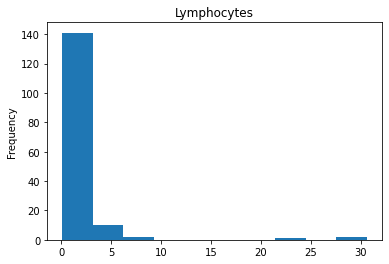

In [30]:
df['lymphocytes'].plot(title='Lymphocytes',kind='hist',xlabel='cell/microL'
                       )

The original data show a right-skewed distribution with a bump on the left side of the distribution and a tail on the right-hand side. Let’s import the EndOfTailImputer class now and impute values into the feature, using the default Gaussian method, which is computed by the following formula:

In [31]:
!pip install -U feature-engine
from feature_engine.imputation import EndTailImputer 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


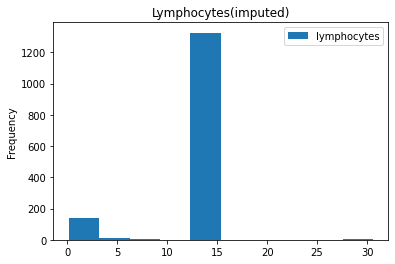

In [32]:
EndTailImputer().fit_transform(df[['lymphocytes']]).plot(
    title='Lymphocytes(imputed)',kind='hist',xlabel='cells/microL'
)

Imputing missing qualitative data

In [34]:
categorical_types=['O']
categorical_columns=df.select_dtypes(include=categorical_types).columns.tolist()
categorical_columns.remove('Diagnosis')
for categorical_column in categorical_columns:
  print('=======')
  print(categorical_column)
  print("=======")
  print(df[categorical_column].value_counts(dropna=False))



InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: InitialPCRDiagnosis, dtype: int64
Sex
M      748
F      658
NaN     76
Name: Sex, dtype: int64
CReactiveProteinLevels
NaN           1345
8                3
0.5              3
15               3
111              2
34.64            2
84               2
0.4              2
1.8              2
0.9              2
38.37            2
0.75             2
9.4              2
0.2              2
5.6              2
12.2             1
6.6              1
6.65             1
11.5             1
3.49             1
108              1
87.9             1
23.6             1
8.2              1
57.8             1
110.2            1
26.08            1
5.1              1
1.2              1
3.3              1
5.2              1
44.9             1
4.9              1
34.2             1
55.6             1
2.58             1
87.93            1
37.13            1
104.3            1
9.56             1
0.7              1
28.4             1
85               1
33.

Create a new column called Female, which will be True if the Sex column indicated Female and False, otherwise.

Use the replace feature in pandas to replace Yes with True and No with False everywhere in our dataset.

In [35]:
df['Female']=df['Sex']=='F'
del df['Sex']
df=df.replace({'Yes':True,'No':False})

As with numerical data, there are many ways we can impute missing categorical data. One such method is called the most-frequent category imputation or mode imputation. As the name suggests, we simply replace missing values with the most common non-missing value:

In [38]:
cat_impute=SimpleImputer(strategy='most_frequent')
print(df['Coughing'].head())
print(cat_impute.fit_transform(df[['Coughing']])[:5])

0    True
1     NaN
2     NaN
3    True
4     NaN
Name: Coughing, dtype: object
[[True]
 [True]
 [True]
 [True]
 [True]]


Log transforms are probably the most common feature transformation technique that replaces each value in a column x with the value log(1 + x). Why 1 + x and not just x? One reason is that we want to be able to handle 0 values, and log(0) is undefined. In fact, the log transform only works on strictly positive data.The log transform’s overall purpose is to make the data look more normal. This is preferred in many cases, mostly because data being normal is one of the most overlooked assumptions in data science. Many underlying tests and algorithms assume that data are normally distributed, including chi-squared tests and logistic regressions. Another reason we would prefer to transform our skewed data into normally distributed data is that the transformation tends to leave behind fewer outliers, and machine learning algorithms don’t tend to work well with outliers.